In [3]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reddit = praw.Reddit(
    # client_id="ClientID",
    # client_secret="API Key",
    # user_agent="Username",
    
)

subreddit = reddit.subreddit("udub")

count = 0
new = []
hot = []
top = []
rising = []
controversial = []

In [4]:
for submission in subreddit.new(limit=None):
    new.append([
        submission.id, submission.title, submission.selftext, 
        submission.link_flair_text, submission.url,
        submission.num_comments, submission.score
    ])

df_new = pd.DataFrame(new, columns=['ID', 'Title', 'Text', 'Flair', 'URL', 'Comments', 'Votes'])

In [5]:
for submission in subreddit.hot(limit=None):
    hot.append([
        submission.id, submission.title, submission.selftext, 
        submission.link_flair_text, submission.url,
        submission.num_comments, submission.score
    ])

df_hot = pd.DataFrame(hot, columns=['ID', 'Title', 'Text', 'Flair', 'URL', 'Comments', 'Votes'])

In [6]:
for submission in subreddit.top(limit=None):
    top.append([
        submission.id, submission.title, submission.selftext, 
        submission.link_flair_text, submission.url,
        submission.num_comments, submission.score
    ])

df_top = pd.DataFrame(top, columns=['ID', 'Title', 'Text', 'Flair', 'URL', 'Comments', 'Votes'])

In [7]:
for submission in subreddit.rising(limit=None):
    rising.append([
        submission.id, submission.title, submission.selftext, 
        submission.link_flair_text, submission.url,
        submission.num_comments, submission.score
    ])

df_rising = pd.DataFrame(rising, columns=['ID', 'Title', 'Text', 'Flair', 'URL', 'Comments', 'Votes'])

In [8]:
for submission in subreddit.controversial(limit=None):
    controversial.append([
        submission.id, submission.title, submission.selftext, 
        submission.link_flair_text, submission.url,
        submission.num_comments, submission.score
    ])

df_controversial = pd.DataFrame(controversial, columns=['ID', 'Title', 'Text', 'Flair', 'URL', 'Comments', 'Votes'])

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_csv("df_new.csv")
df_controversial = pd.read_csv("df_controversial.csv")
df_hot = pd.read_csv("df_hot.csv")
df_rising = pd.read_csv("df_rising.csv")
df_top = pd.read_csv("df_top.csv")

# Combine all dataframes
df_new['Category'] = 'new'
df_hot['Category'] = 'hot'
df_top['Category'] = 'top'
df_rising['Category'] = 'rising'
df_controversial['Category'] = 'controversial'

df_all = pd.concat([df_new, df_hot, df_top, df_rising, df_controversial])
df_all = df_all.drop_duplicates(subset='ID')

df_all.to_csv('df_all.csv')

df_all


,ID,Title,Text,Flair,URL,Comments,Votes,Category
0,1c7kf12,Any cool stores near the UW?,I want to kill a couple of hours or so at shop...,NaN,https://www.reddit.com/r/udub/comments/1c7kf12...,2,2,new
1,1c7h6vu,Suzzallo Starbucks Deals,Do the campus starbucks (more specially Suzzal...,NaN,https://www.reddit.com/r/udub/comments/1c7h6vu...,3,0,new
2,1c7ezoi,UW or CWRU (case western) for pre med?,Pre-med with intended major: Global Affairs/In...,Advice,https://www.reddit.com/r/udub/comments/1c7ezoi...,1,0,new
3,1c7ez05,Full size bed frame for free,Getting rid of a bed frame. It will be taken a...,NaN,https://www.reddit.com/r/udub/comments/1c7ez05...,2,1,new
4,1c7cqxb,How UW investigates sexual assault allegations...,NaN,NaN,https://www.seattletimes.com/seattle-news/law-...,0,3,new
...,...,...,...,...,...,...,...,...
991,18y1jd6,Does anyone have CS 122 Assignment Prompts?,I'm looking to work ahead in CS122 and start o...,NaN,https://www.reddit.com/r/udub/comments/18y1jd6...,5,0,controversial
992,18jccxx,Do I need an associate degree to transfer?,I know exactly which classes I want to do in c...,Advice,https://www.reddit.com/r/udub/comments/18jccxx...,7,0,controversial
993,184zjj8,Major Options,Hi! i’m thinking about pursuing the informatic...,NaN,https://www.reddit.com/r/udub/comments/184zjj8...,6,0,controversial
994,179dpxa,Selling up to 3 Dawg Pack tickets for Arizona ...,"dm if interested\n\ngiven all the scams, i'll ...",NaN,https://www.reddit.com/r/udub/comments/179dpxa...,1,0,controversial


### Question: How are flairs distributed across different types of Reddit submissions (new, hot, top, rising, controversial)?
#### Hypothesis: The distribution of flairs varies significantly across different submission types, reflecting varying user engagement and content preferences.

Understanding flair distribution can help optimize automatic flair assignment algorithms to better reflect the dynamic nature of Reddit submissions.
This analysis could lead to improved content discoverability and enhanced moderation processes.

Flair: A label used on Reddit to categorize posts.
Datasets: Collections of Reddit posts categorized into new, hot, top, rising, and controversial based on Reddit's sorting algorithms.

Different types of posts might attract different flairs based on the audience's interest of the post.
The dataset collected provides a comprehensive overview of flair usage across different post types.
Potential bias is that people who flair their post will flair but those that don't will not, and the definition of flairs might be biased to those that flair.

Data was collected using the PRAW (Python Reddit API Wrapper) for different post categories.
Analysis included counting flairs, creating pivot tables, and visualizing distributions through heatmaps and scatter plots.

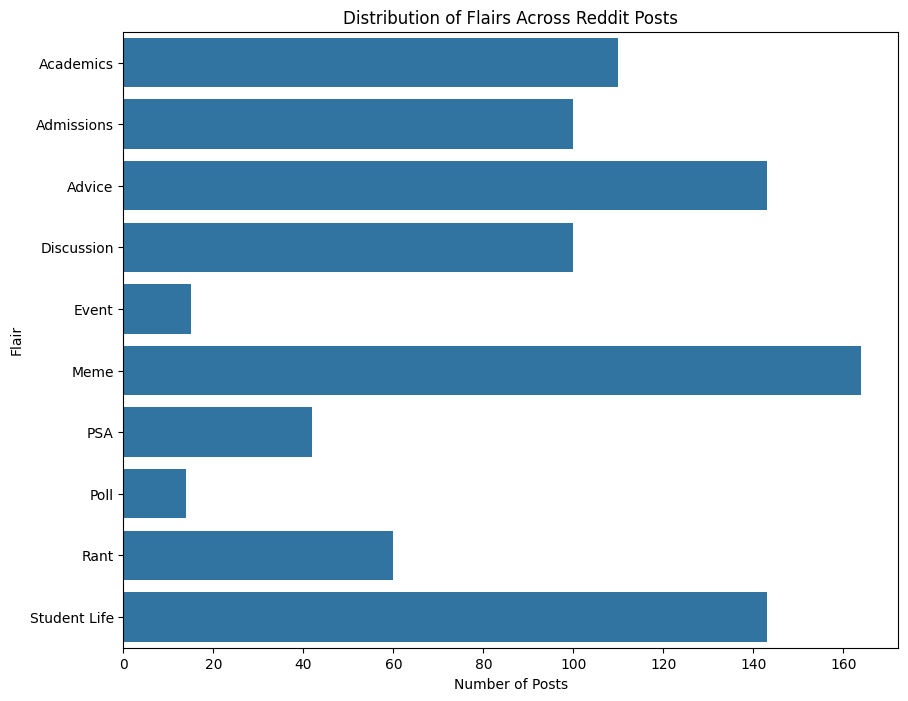

In [2]:
# Count flairs in each category
flair_counts = df_all.groupby(['Flair']).size().reset_index(name='Counts')

# Plot distribution
plt.figure(figsize=(10, 8))
sns.barplot(data=flair_counts, x='Counts', y='Flair')
plt.title('Distribution of Flairs Across Reddit Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Flair')
plt.show()

Here we see in the combined dataset (used to remove duplicate post_id), that the flairs with the most posts are Meme, Student Life, Advice, Academics, and Admissions. This may change based on the time of the API calling of the data and there are still many other posts without flairs but this is generally the trend that we found. The assumption for this result is that, those posts are most likely to be in need of clear categorizing and attention so that the users are able to find the posts and the post creator is able to get more interactions. Meme, especially being flaired a lot maybe has to deal with not-violating the subreddit policy and making sure to flair as Meme.

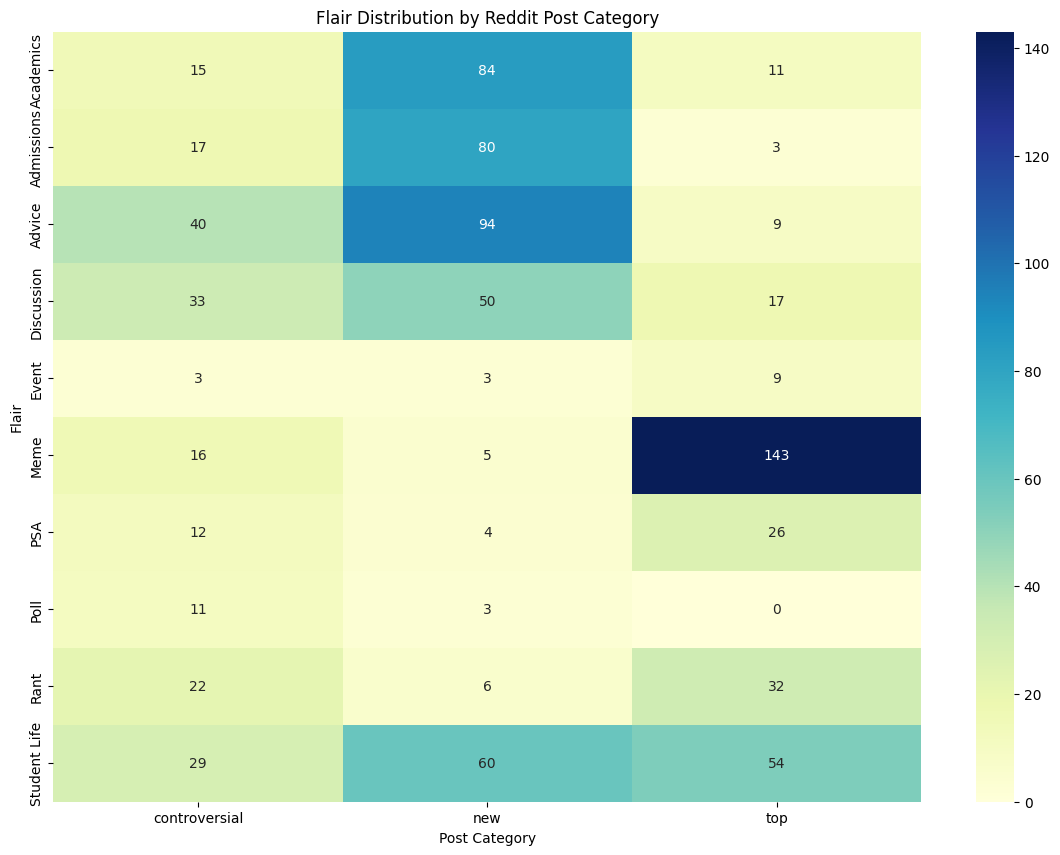

In [3]:
# Create a pivot table for flair counts by category
category_flair_distribution = df_all.pivot_table(index='Flair', columns='Category', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(category_flair_distribution, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Flair Distribution by Reddit Post Category')
plt.xlabel('Post Category')
plt.ylabel('Flair')
plt.show()

Using the combined dataframe by removing duplicate IDs, we can only see what kind of flairs and how many of them exist across the different categories on Reddit like new, hot, controversial, top, and rising. However, we are only getting the flair distribution across the categories for controversial, new, and top only. One few things that stands out would be a lot of Meme flairs in top category and Advice, Admissions, and Academics in new. Showing that people are constantly making posts related to Advice, Admissions, and Academics.

In [4]:
# Instead of dropping duplicates only by 'ID', consider including 'Category' if IDs might repeat across categories
df_all = pd.concat([df_new, df_hot, df_top, df_rising, df_controversial], ignore_index=True)
df_all.drop_duplicates(subset=['ID', 'Category'], inplace=True)  # Using both ID and Category as unique identifiers

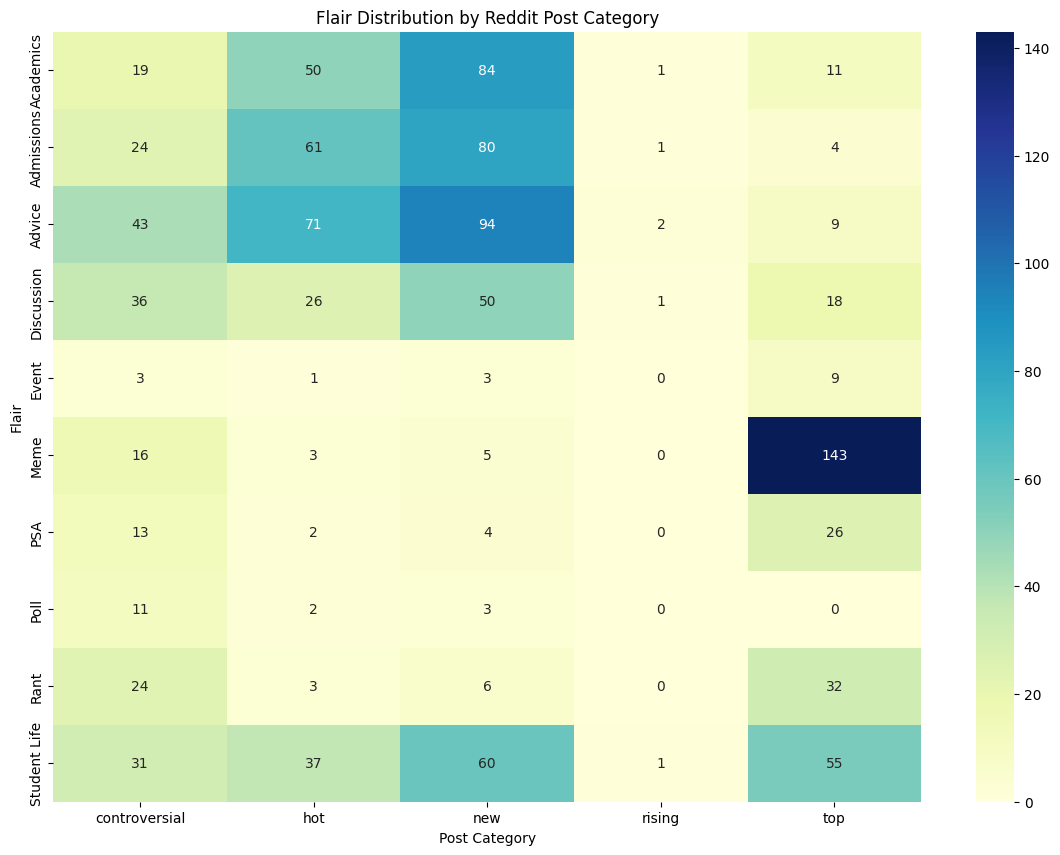

In [5]:
# Create a pivot table for flair counts by category
category_flair_distribution = df_all.pivot_table(index='Flair', columns='Category', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(category_flair_distribution, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Flair Distribution by Reddit Post Category')
plt.xlabel('Post Category')
plt.ylabel('Flair')
plt.show()

Because we weren't able to clearly see the distribution of flairs in all categories, now the df_all was updated to remove duplicated using the set of ID and Category. Here, we still see a similar patterns in top and new as before, but now we have the category, hot. In hot category, Advice seems to be the most flaired, showing that users making posts regarding Advice tends to flair most so that their content can be better seen and understood.

Now that brings us to get curious about the content interaction on differnet by each flairs. Asking the questions, what would be the average votes and number of comments on different flairs?

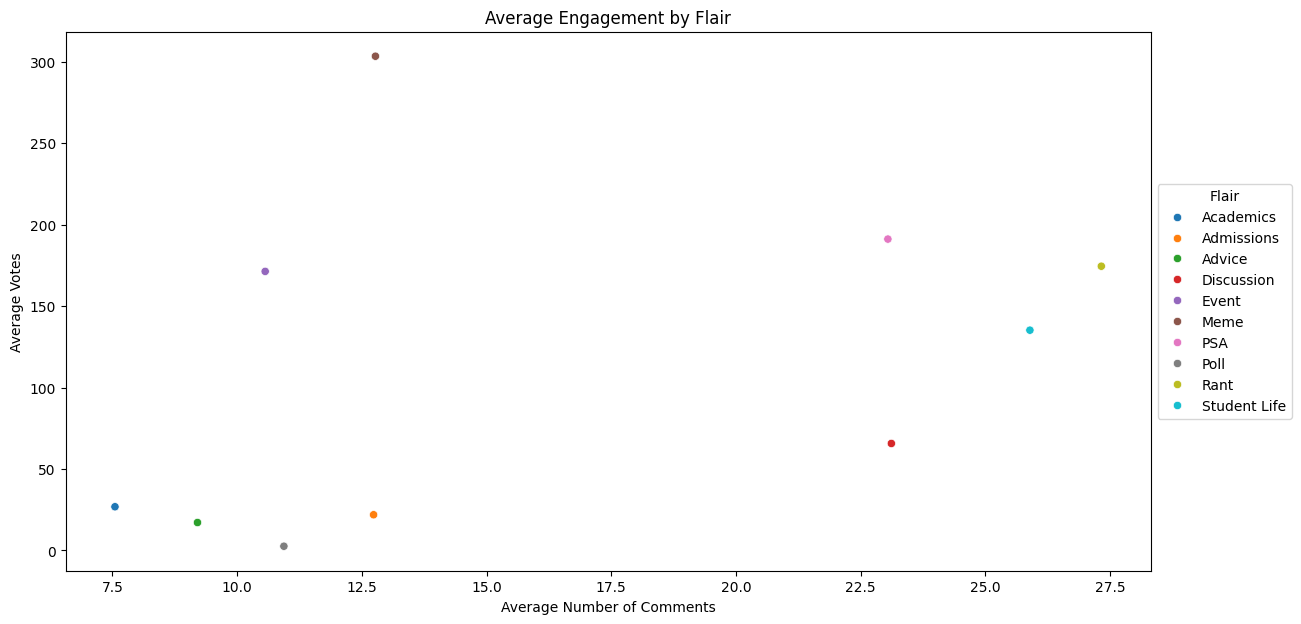

In [6]:
# Calculate average comments and votes by flair
engagement_by_flair = df_all.groupby('Flair').agg({'Comments': 'mean', 'Votes': 'mean'}).reset_index()

# Plotting engagement by flair
plt.figure(figsize=(14, 7))
sns.scatterplot(data=engagement_by_flair, x='Comments', y='Votes', hue='Flair')
plt.title('Average Engagement by Flair')
plt.xlabel('Average Number of Comments')
plt.ylabel('Average Votes')
plt.legend(title='Flair', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Here what we can find in this scatter plot using the average votes and average number of comments, we can find that there are a lot of interactions in flairs Meme, Student Life, Rant, Event, and PSA. Each of them show the characteristics as expected and not all of them are most well flaired posts as we've found above. Some flairs that are well flaired and have lots of interactions would be Student Life and Meme. Other than that, it is interesting that Rant flair tend to get high votes and Comments, possibly showing that a lot of people can relate to those rants. 